In [1]:
import matplotlib.pylab as plt
import numpy as np

In [101]:
pos_80k_validation = {
    19.48:48.6,
    48.17:53.72,
    74.25:55.76,
    100.05:53.04,
    123.2:57.66


}

nopos_80k_validation = {
    26.17:36.65,
    52.18:45.04,
    75.37:52.29,
    95.5:52.89,
    115.5:56.14
}

In [102]:
def buildDict(lines):
    acc_dict = {}
    current_time = 0
    prev_time = 0
    for line in lines:
        #check if new epoch
        if line[:1] == 'e':
            prev_time = 0
            continue

        split = line[:6].split(' ')
        mins = split[0][:-1]
        secs = split[1][:-1]

        cur = float(mins) + float(secs)/60
        current_time += (cur - prev_time)
        prev_time = cur
        
#        print(current_time)
        acc_value = float(line[-5:])

        acc_dict[current_time] = acc_value
    return acc_dict


In [108]:
lines_pos = []
with open('pos_80k_parse') as f:
    for line in f:
        lines_pos.append(line.rstrip('\n'))
        
lines_nopos = []
with open('nopos_80k_parse') as f:
    for line in f:
        lines_nopos.append(line.rstrip('\n'))
        
pos_80k_dict = buildDict(lines_pos)
nopos_80k_dict = buildDict(lines_nopos)


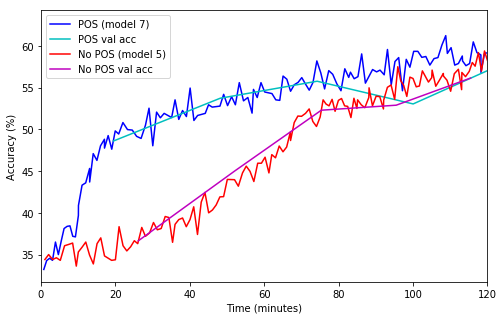

In [112]:
sorted_pos_dict = sorted(pos_80k_dict.items())
x_pos, y_pos = zip(*sorted_pos_dict)
plt.plot(x_pos, y_pos, c='b', label='POS (model 7)')

sorted_val_dict = sorted(pos_80k_validation.items())
x_pos_val, y_pos_val = zip(*sorted_val_dict)
plt.plot(x_pos_val, y_pos_val, c='c', label='POS val acc')

sorted_nopos_dict = sorted(nopos_80k_dict.items())
x_nopos, y_nopos = zip(*sorted_nopos_dict)
plt.plot(x_nopos, y_nopos, c='r', label='No POS (model 5)')

sorted_val_dict_no = sorted(nopos_80k_validation.items())
x_nopos_val, y_nopos_val = zip(*sorted_val_dict_no)
plt.plot(x_nopos_val, y_nopos_val, c='m', label='No POS val acc')

plt.xlabel("Time (minutes)")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (8,5)
plt.xlim(0, 120)
plt.show()